<a href="https://www.kaggle.com/code/sjagkoo7/time-series-crypto-currencies?scriptVersionId=139074341" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import profile_report

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-o

/kaggle/input/crypto-currencies-data-set/data1.csv


# Reading the Dataset

In [2]:
crypto_time=pd.read_csv('/kaggle/input/crypto-currencies-data-set/data1.csv')
crypto_time

Timestamp      Open      High       Low     Close  Volume_(BTC)  \
0       1557148860   5632.41   5635.76   5629.10   5633.36      1.405411   
1       1557148920   5636.48   5638.76   5633.14   5638.76      0.892639   
2       1557148980   5636.35   5637.12   5632.16   5635.58      3.845588   
3       1557149040   5632.64   5634.31   5628.66   5634.31      6.542373   
4       1557149100   5628.85   5631.61   5628.85   5629.08      0.063818   
...            ...       ...       ...       ...       ...           ...   
999995  1617148560  58714.31  58714.31  58686.00  58686.00      1.384487   
999996  1617148620  58683.97  58693.43  58683.97  58685.81      7.294848   
999997  1617148680  58693.43  58723.84  58693.43  58723.84      1.705682   
999998  1617148740  58742.18  58770.38  58742.18  58760.59      0.720415   
999999  1617148800  58767.75  58778.18  58755.97  58778.18      2.712831   

        Volume_(Currency)  Weighted_Price  
0             7917.066006     5633.273178  
1             5033.067778     5638.413488  
2            21675.008206     5636.331776  
3            36837.086909     5630.539261  
4              359.394486     5631.527108  
...                   ...             ...  
999995       81259.372187    58692.753339  
999996      428158.146640    58693.226508  
999997      100117.070370    58696.198496  
999998       42332.958633    58761.866202  
999999      159417.751000    58764.349363  

[1000000 rows x 8 columns]

In [3]:
crypto_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Timestamp          1000000 non-null  int64  
 1   Open               987554 non-null   float64
 2   High               987554 non-null   float64
 3   Low                987554 non-null   float64
 4   Close              987554 non-null   float64
 5   Volume_(BTC)       987554 non-null   float64
 6   Volume_(Currency)  987554 non-null   float64
 7   Weighted_Price     987554 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 61.0 MB


> *Here except Timestamp all columns have few null values which require to handle which we see in coming scetions*

In [4]:
crypto_time.describe()

Timestamp           Open           High            Low  \
count  1.000000e+06  987554.000000  987554.000000  987554.000000   
mean   1.587149e+09   14766.800196   14777.071639   14756.483396   
std    1.732052e+07   12572.503751   12583.228213   12561.531217   
min    1.557149e+09    3858.270000    3927.050000    3850.000000   
25%    1.572149e+09    8464.990000    8469.175000    8460.055000   
50%    1.587149e+09    9782.455000    9788.730000    9776.940000   
75%    1.602149e+09   11880.625000   11887.117500   11875.050000   
max    1.617149e+09   61763.560000   61781.830000   61673.550000   

               Close  Volume_(BTC)  Volume_(Currency)  Weighted_Price  
count  987554.000000  9.875540e+05       9.875540e+05   987554.000000  
mean    14766.809405  6.086695e+00       8.879270e+04    14766.883422  
std     12572.801704  1.616051e+01       2.465049e+05    12571.871645  
min      3865.000000  1.700000e-07       9.133420e-04     3875.980373  
25%      8464.505000  3.310995e-01       3.339827e+03     8464.947580  
50%      9782.425000  1.618063e+00       1.991209e+04     9783.296140  
75%     11880.860000  5.492603e+00       7.546337e+04    11881.328871  
max     61781.800000  1.098349e+03       1.390067e+07    61716.205341

# Dataset Information 

In [5]:
#crypto_time.shape # total rows and columns
#crypto_time.size  # total elements present in dataset
crypto_time.columns.to_list() # list of columns name in datset
#len(crypto_time.columns) # total columns in dataset
#len(crypto_time) # total rows in datset

['Timestamp',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume_(BTC)',
 'Volume_(Currency)',
 'Weighted_Price']

# Data Preprocessing - Handling Null Values

In [6]:
#displaying the cells having null values
#crypto_time[crypto_time['Open'].isna()]
crypto_time.loc[crypto_time['Open'].isna()]

Timestamp  Open  High  Low  Close  Volume_(BTC)  Volume_(Currency)  \
145     1557157560   NaN   NaN  NaN    NaN           NaN                NaN   
306     1557167220   NaN   NaN  NaN    NaN           NaN                NaN   
555     1557182160   NaN   NaN  NaN    NaN           NaN                NaN   
984     1557207900   NaN   NaN  NaN    NaN           NaN                NaN   
1072    1557213180   NaN   NaN  NaN    NaN           NaN                NaN   
...            ...   ...   ...  ...    ...           ...                ...   
998868  1617080940   NaN   NaN  NaN    NaN           NaN                NaN   
998931  1617084720   NaN   NaN  NaN    NaN           NaN                NaN   
998999  1617088800   NaN   NaN  NaN    NaN           NaN                NaN   
999963  1617146640   NaN   NaN  NaN    NaN           NaN                NaN   
999991  1617148320   NaN   NaN  NaN    NaN           NaN                NaN   

        Weighted_Price  
145                NaN  
306                NaN  
555                NaN  
984                NaN  
1072               NaN  
...                ...  
998868             NaN  
998931             NaN  
998999             NaN  
999963             NaN  
999991             NaN  

[12446 rows x 8 columns]

> *as all feature entries are null except Timestamp so it's it better to drop these entries*

In [7]:
crypto_time.isna().sum()

Timestamp                0
Open                 12446
High                 12446
Low                  12446
Close                12446
Volume_(BTC)         12446
Volume_(Currency)    12446
Weighted_Price       12446
dtype: int64

In [8]:
#dropping the all null entries
crypto_time=crypto_time.dropna()

In [9]:
crypto_time.loc[crypto_time['Open'].isna()]

Empty DataFrame
Columns: [Timestamp, Open, High, Low, Close, Volume_(BTC), Volume_(Currency), Weighted_Price]
Index: []

In [10]:
crypto_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987554 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Timestamp          987554 non-null  int64  
 1   Open               987554 non-null  float64
 2   High               987554 non-null  float64
 3   Low                987554 non-null  float64
 4   Close              987554 non-null  float64
 5   Volume_(BTC)       987554 non-null  float64
 6   Volume_(Currency)  987554 non-null  float64
 7   Weighted_Price     987554 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 67.8 MB


# Data Preprocessing - Data Cleaning

In [11]:
#since dataset feature are numerical so checking unique value won't make any sense so let's leave this. We shall check duplciates entries in dataset.
# cols=crypto_time.columns.to_list()
# for col in cols:
#     print(crypto_time[cols].value_counts())

In [12]:
# Finding Duplicates Rows
#duplicate_rows_data=crypto_time.loc[crypto_time.duplicated()]
duplicate_rows_data=crypto_time[crypto_time.duplicated()]
duplicate_rows_data

Empty DataFrame
Columns: [Timestamp, Open, High, Low, Close, Volume_(BTC), Volume_(Currency), Weighted_Price]
Index: []

> *here there is no duplicate entries in whole dataset*

In [13]:
#if duplicates exist - then we can remove using below
crypto_time=crypto_time.drop_duplicates()

In [14]:
crypto_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987554 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Timestamp          987554 non-null  int64  
 1   Open               987554 non-null  float64
 2   High               987554 non-null  float64
 3   Low                987554 non-null  float64
 4   Close              987554 non-null  float64
 5   Volume_(BTC)       987554 non-null  float64
 6   Volume_(Currency)  987554 non-null  float64
 7   Weighted_Price     987554 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 67.8 MB


# Feature Engineering

In [15]:
crypto_time_up=crypto_time.copy()

>**Performing following change**
* Converting Timetsamp to Datetime format with unit as **s** and renaming as 'Date'
* Renaming 'Weighted_Price' column as 'Price'

In [16]:
crypto_time_up['Timestamp']=pd.to_datetime(crypto_time_up['Timestamp'],unit='s')

In [17]:
crypto_time_up

Timestamp      Open      High       Low     Close  \
0      2019-05-06 13:21:00   5632.41   5635.76   5629.10   5633.36   
1      2019-05-06 13:22:00   5636.48   5638.76   5633.14   5638.76   
2      2019-05-06 13:23:00   5636.35   5637.12   5632.16   5635.58   
3      2019-05-06 13:24:00   5632.64   5634.31   5628.66   5634.31   
4      2019-05-06 13:25:00   5628.85   5631.61   5628.85   5629.08   
...                    ...       ...       ...       ...       ...   
999995 2021-03-30 23:56:00  58714.31  58714.31  58686.00  58686.00   
999996 2021-03-30 23:57:00  58683.97  58693.43  58683.97  58685.81   
999997 2021-03-30 23:58:00  58693.43  58723.84  58693.43  58723.84   
999998 2021-03-30 23:59:00  58742.18  58770.38  58742.18  58760.59   
999999 2021-03-31 00:00:00  58767.75  58778.18  58755.97  58778.18   

        Volume_(BTC)  Volume_(Currency)  Weighted_Price  
0           1.405411        7917.066006     5633.273178  
1           0.892639        5033.067778     5638.413488  
2           3.845588       21675.008206     5636.331776  
3           6.542373       36837.086909     5630.539261  
4           0.063818         359.394486     5631.527108  
...              ...                ...             ...  
999995      1.384487       81259.372187    58692.753339  
999996      7.294848      428158.146640    58693.226508  
999997      1.705682      100117.070370    58696.198496  
999998      0.720415       42332.958633    58761.866202  
999999      2.712831      159417.751000    58764.349363  

[987554 rows x 8 columns]

In [18]:
crypto_time_up=crypto_time_up.rename(columns={'Timestamp':'Date','Weighted_Price':'Price'})

In [19]:
crypto_time_up

Date      Open      High       Low     Close  \
0      2019-05-06 13:21:00   5632.41   5635.76   5629.10   5633.36   
1      2019-05-06 13:22:00   5636.48   5638.76   5633.14   5638.76   
2      2019-05-06 13:23:00   5636.35   5637.12   5632.16   5635.58   
3      2019-05-06 13:24:00   5632.64   5634.31   5628.66   5634.31   
4      2019-05-06 13:25:00   5628.85   5631.61   5628.85   5629.08   
...                    ...       ...       ...       ...       ...   
999995 2021-03-30 23:56:00  58714.31  58714.31  58686.00  58686.00   
999996 2021-03-30 23:57:00  58683.97  58693.43  58683.97  58685.81   
999997 2021-03-30 23:58:00  58693.43  58723.84  58693.43  58723.84   
999998 2021-03-30 23:59:00  58742.18  58770.38  58742.18  58760.59   
999999 2021-03-31 00:00:00  58767.75  58778.18  58755.97  58778.18   

        Volume_(BTC)  Volume_(Currency)         Price  
0           1.405411        7917.066006   5633.273178  
1           0.892639        5033.067778   5638.413488  
2           3.845588       21675.008206   5636.331776  
3           6.542373       36837.086909   5630.539261  
4           0.063818         359.394486   5631.527108  
...              ...                ...           ...  
999995      1.384487       81259.372187  58692.753339  
999996      7.294848      428158.146640  58693.226508  
999997      1.705682      100117.070370  58696.198496  
999998      0.720415       42332.958633  58761.866202  
999999      2.712831      159417.751000  58764.349363  

[987554 rows x 8 columns]

# Visualization

In [20]:
# Detailed Report
crypto_time_up.profile_report(title='Report',progress_bar=False)

In [21]:
# Co - relation
corr=crypto_time_up.corr()
corr

/tmp/ipykernel_20/575484429.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=crypto_time_up.corr()


Open      High       Low     Close  Volume_(BTC)  \
Open               1.000000  0.999999  0.999999  0.999998     -0.005287   
High               0.999999  1.000000  0.999998  0.999999     -0.004923   
Low                0.999999  0.999998  1.000000  0.999999     -0.005771   
Close              0.999998  0.999999  0.999999  1.000000     -0.005330   
Volume_(BTC)      -0.005287 -0.004923 -0.005771 -0.005330      1.000000   
Volume_(Currency)  0.272461  0.273001  0.271771  0.272418      0.767239   
Price              0.999999  0.999999  0.999999  0.999999     -0.005359   

                   Volume_(Currency)     Price  
Open                        0.272461  0.999999  
High                        0.273001  0.999999  
Low                         0.271771  0.999999  
Close                       0.272418  0.999999  
Volume_(BTC)                0.767239 -0.005359  
Volume_(Currency)           1.000000  0.272379  
Price                       0.272379  1.000000

<Axes: >

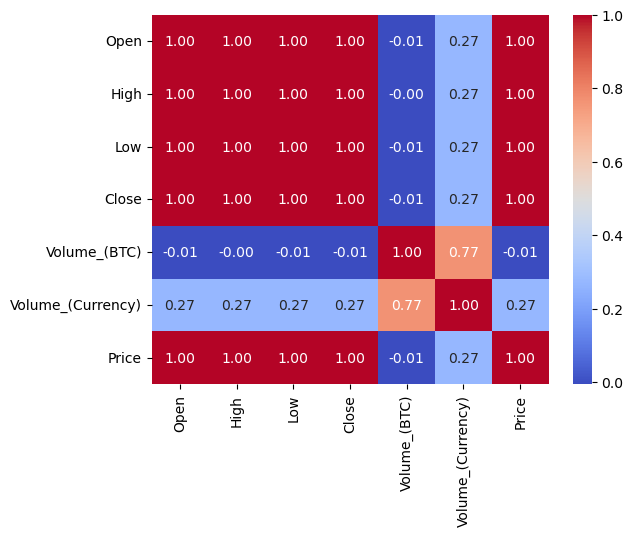

In [22]:
# heatmap of the Corelation
sns.heatmap(corr,cmap='coolwarm',annot=True,fmt='.2f')

# Data - Preparation 
* Covert `Timestamp` to datetime format with unit `s` and rename as `Date`
* Rename `Weighted_Price` as `Price`
* Drop all columns except Date and Price
* Set `Date` as DataFrame index


In [23]:
# Timestamp and Renaming Weighted_Price setup is done in previous cells
df=crypto_time_up[['Date','Price']]
df.set_index('Date', inplace=True)

In [24]:
df.head(5)

Price
Date                            
2019-05-06 13:21:00  5633.273178
2019-05-06 13:22:00  5638.413488
2019-05-06 13:23:00  5636.331776
2019-05-06 13:24:00  5630.539261
2019-05-06 13:25:00  5631.527108

# Data - Resampling 
* Downsample the dataframe into `15H` format and use the aggregation as mean
* Store the resmapled dataframe into the varaible `df_resample`.
* Drop the missing values, if any, from the resampled dataframe
* Figure size - `12x8` , using plot() method . Plot Time Series fluctuation of Price vs Date.
* Title - `Price vs Date` ; xlabel as `Date` ; ylabel as `Price`.

In [25]:
df_resample= df.resample('15H').mean()

In [26]:
df_resample.head(5)

Price
Date                            
2019-05-06 00:00:00  5644.105808
2019-05-06 15:00:00  5751.252518
2019-05-07 06:00:00  5877.700529
2019-05-07 21:00:00  5816.950504
2019-05-08 12:00:00  5909.668461

In [27]:
df_resample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1113 entries, 2019-05-06 00:00:00 to 2021-03-31 00:00:00
Freq: 15H
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1113 non-null   float64
dtypes: float64(1)
memory usage: 17.4 KB


Text(0, 0.5, 'Price')

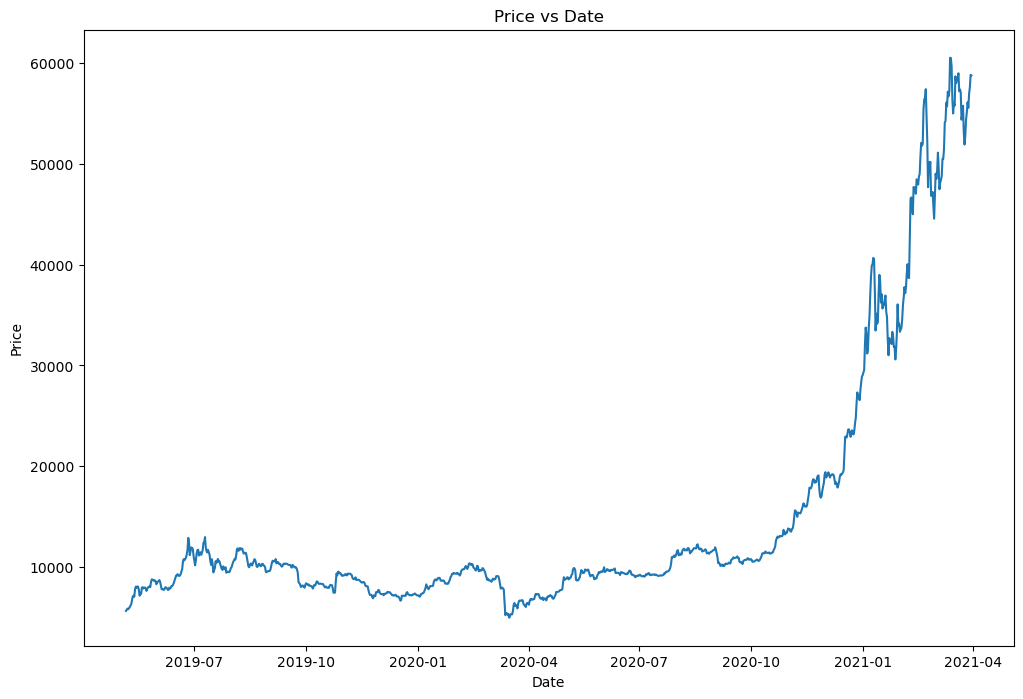

In [28]:
plt.figure(figsize=(12,8))
plt.plot(df_resample['Price'])
plt.title('Price vs Date')
plt.xlabel('Date')
plt.ylabel('Price')

# Check for - Stationarity
* Create a Series variable `ts` and assign it with column values.
* Find P-value  using pre-defined function `test_stationarity` and store in `pvalue1` after rounding off  four decimal places.
>Choose the correct answer from the options based on the p-value
* **Null Hypothesis(HO) : Time Series is Non-Stationarity - Series has unit root**
* **Alternate Hypothesis(HA) : Time Series is Stationarity - Series has not unit root**
> **Conditions to Reject Null Hypothesis(HO)**
- If **Test statistic < Critical Value and p-value < 0.05** – Reject Null Hypothesis(HO), i.e., time series does not have a unit root, meaning it is *stationary*. It does not have a time-dependent structure.

In [29]:
#Create a Series variable ts and assign it with column values.
# ts - column that contains the time series data means data created with time series which is price not date
ts=pd.Series(df_resample.Price)
ts

Date
2019-05-06 00:00:00     5644.105808
2019-05-06 15:00:00     5751.252518
2019-05-07 06:00:00     5877.700529
2019-05-07 21:00:00     5816.950504
2019-05-08 12:00:00     5909.668461
                           ...     
2021-03-28 12:00:00    55554.709032
2021-03-29 03:00:00    56939.637375
2021-03-29 18:00:00    57574.808358
2021-03-30 09:00:00    58816.854837
2021-03-31 00:00:00    58764.349363
Freq: 15H, Name: Price, Length: 1113, dtype: float64

In [30]:
# Stationarity - using Agumented Dicky - Fuller (ADF) tests 
from statsmodels.tsa.stattools import adfuller

In [31]:
# Define a function to perform the ADF test and return the p-value 
def test_stationarity(timeseries):
    result=adfuller(timeseries)
    print('Results of Dickey - Fuller Test:')
    # adfuller function returns a tuple containing multiple values related to the test results.
    #To extract the p-value from the returned tuple, we access the second element of the tuple using result[1].
    p_value = result[1] 
    return p_value

In [32]:
# Calculate the p-value using the test_stationarity ADF function
pvalue1 = test_stationarity(ts)
#Round off the p-value to four decimal places
pvalue1 = round(pvalue1, 4)
#Print the p-value
print("P-value:", pvalue1)

Results of Dickey - Fuller Test:
P-value: 1.0


In [33]:
# Define a function to perform the ADF test
def test_stationarity_ADF(timeseries):
    dftest=adfuller(timeseries , autolag='AIC')
    print(dftest)
    print('Results of Dickey - Fuller Test:')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [34]:
# Full report of ADF test
test_stationarity_ADF(ts)

(3.1216462438673513, 1.0, 22, 1090, {'1%': -3.4363635475753824, '5%': -2.864195245967465, '10%': -2.5681837404258903}, 16923.24163667002)
Results of Dickey - Fuller Test:
Test Statistic                    3.121646
p-value                           1.000000
#Lags Used                       22.000000
Number of Observations Used    1090.000000
Critical Value (1%)              -3.436364
Critical Value (5%)              -2.864195
Critical Value (10%)             -2.568184
dtype: float64


# Conclusion - Agumented Dicky - Fuller (ADF) Test 
* The Test Statistic is 3.121646, which is greater than any of the critical values.
* p-value is 1.000000
* The p-value obtained is greater than the significance level of 0.05, and the ADF statistic is higher than any of the critical values. Clearly, there is no reason to reject the null hypothesis. So, the time series is, in fact, non-stationary.

In [35]:
# Stationarity - using Kwiatkowski–Phillips–Schmidt–Shin (KPSS) tests
from statsmodels.tsa.stattools import kpss

In [36]:
# Define a function to perform the kpss test
def test_stationarity_KPSS(timeseries):
    dftest=kpss(timeseries , regression='c',nlags='auto')
    print(dftest)
    print('Results of Kwiatkowski–Phillips–Schmidt–Shin Test:')
    dfoutput=pd.Series(dftest[0:3],index=['Test Statistic','p-value','#Lags Used'])
    for key,value in dftest[3].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [37]:
# Full report of kpss test
test_stationarity_KPSS(ts)

(2.7117831558064296, 0.01, 20, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
Results of Kwiatkowski–Phillips–Schmidt–Shin Test:
Test Statistic            2.711783
p-value                   0.010000
#Lags Used               20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/tmp/ipykernel_20/1256350892.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  dftest=kpss(timeseries , regression='c',nlags='auto')


# Conclusion - Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test 
* Test Statistic > Critical Value and p-value < 0.05. As a result, we reject the Null hypothesis in favor of an Alternative.
  Hence we conclude series is non-stationary

# Removing Trend
* Reduce the trend using log transforamtion. Assign the timeseries to the variable `ts_log` after applying the `log` method from  Numpy package 
* Perform Smoothing operation using **Exponential Weighted Moving Average** method. Set `halflife` parameter to **24**.Findout the mean of the result and assign it to the variable `ewma`.
* Create a figure of size `12x8`. Using the plot() method. plot the variables `ts_log` and `ewma`.use color **red** for denoting **ewma** and apply the marker as '--'.
* Set the title as `Exponential Weighted Moving Average` and add the label called `EWMA`.
* Find out the p-value using  the pre-defined function `test_stationarity` and store it in the variable `pvalue2` after rounding off to four decimal places.
* Choose the correct answer from the options based on the p-value

In [38]:
# Apply log transformation on variable ts
ts_log=np.log(ts) # for log transformation we have to use only numeric data. data is in other format like object , datatime won't be used.
# Perform Exponential Weighted Moving Average (EWMA) smoothing
halflife=24
ewma = ts_log.ewm(halflife=halflife, ignore_na=False, min_periods=0, adjust=True).mean()

In [39]:
ts_log

Date
2019-05-06 00:00:00     8.638367
2019-05-06 15:00:00     8.657173
2019-05-07 06:00:00     8.678921
2019-05-07 21:00:00     8.668531
2019-05-08 12:00:00     8.684345
                         ...    
2021-03-28 12:00:00    10.925124
2021-03-29 03:00:00    10.949747
2021-03-29 18:00:00    10.960840
2021-03-30 09:00:00    10.982184
2021-03-31 00:00:00    10.981291
Freq: 15H, Name: Price, Length: 1113, dtype: float64

In [40]:
ewma

Date
2019-05-06 00:00:00     8.638367
2019-05-06 15:00:00     8.647906
2019-05-07 06:00:00     8.658544
2019-05-07 21:00:00     8.661150
2019-05-08 12:00:00     8.666061
                         ...    
2021-03-28 12:00:00    10.838806
2021-03-29 03:00:00    10.841964
2021-03-29 18:00:00    10.845348
2021-03-30 09:00:00    10.849243
2021-03-31 00:00:00    10.853003
Freq: 15H, Name: Price, Length: 1113, dtype: float64

Text(0, 0.5, 'Log - EWMA Price')

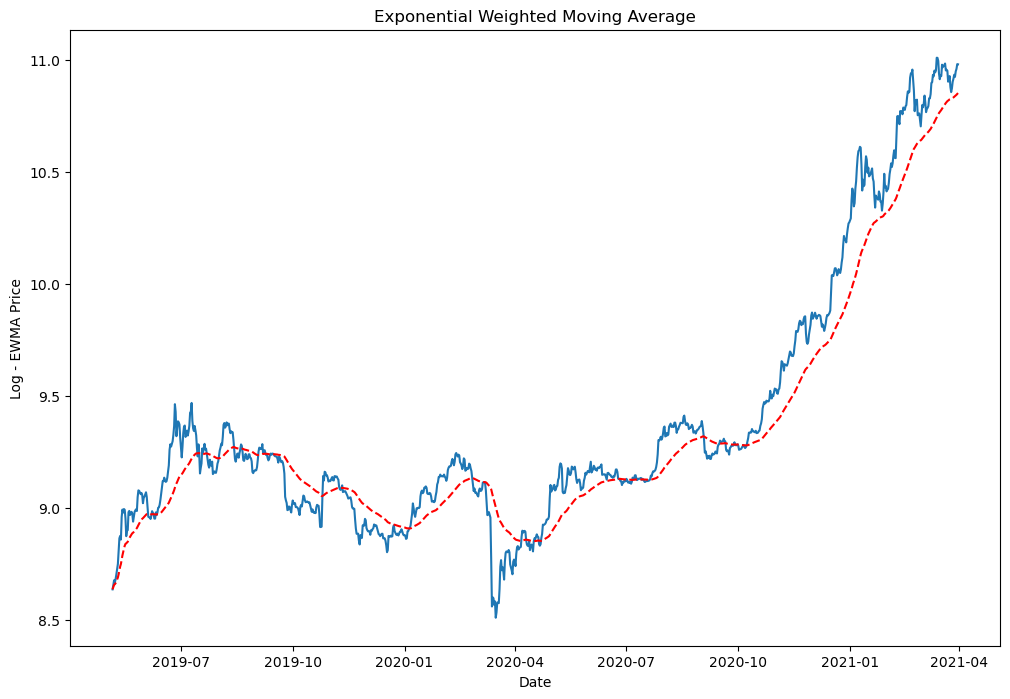

In [41]:
# plot the variables ts_log and ewma.use color red for denoting ewma and apply the marker as '--'
plt.figure(figsize=(12,8))
plt.plot(ts_log)
plt.plot(ewma, color='red', linestyle='--', label='EWMA')
plt.title('Exponential Weighted Moving Average')
plt.xlabel('Date')
plt.ylabel('Log - EWMA Price')

In [42]:
# Calculate the p-value using the test_stationarity ADF function
pvalue2 = test_stationarity(ewma)
#Round off the p-value to four decimal places
pvalue2 = round(pvalue2, 4)
#Print the p-value
print("P-value:", pvalue2)

Results of Dickey - Fuller Test:
P-value: 0.9886


* p-value is 0.9886
* The p-value obtained is greater than the significance level of 0.05 , there is no reason to reject the null hypothesis. So, the time series is, in fact, non-stationary.

In [43]:
# Full report of ADF test
test_stationarity_ADF(ewma)

(0.6406501619607007, 0.9885758856279696, 3, 1109, {'1%': -3.436260280202547, '5%': -2.864149693787122, '10%': -2.568159479632582}, -12650.90832553311)
Results of Dickey - Fuller Test:
Test Statistic                    0.640650
p-value                           0.988576
#Lags Used                        3.000000
Number of Observations Used    1109.000000
Critical Value (1%)              -3.436260
Critical Value (5%)              -2.864150
Critical Value (10%)             -2.568159
dtype: float64


# Trend Conclusion - Agumented Dicky - Fuller (ADF) Test 
* The Test Statistic is 0.640650, which is greater than any of the critical values.
* p-value is 0.988576
* The p-value obtained is greater than the significance level of 0.05, and the ADF statistic is higher than any of the critical values. Clearly, there is no reason to reject the null hypothesis. So, the time series is, in fact, non-stationary.

In [44]:
# Full report of kpss test
test_stationarity_KPSS(ewma)

(3.067370745346982, 0.01, 20, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
Results of Kwiatkowski–Phillips–Schmidt–Shin Test:
Test Statistic            3.067371
p-value                   0.010000
#Lags Used               20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/tmp/ipykernel_20/1256350892.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  dftest=kpss(timeseries , regression='c',nlags='auto')


# Trend Conclusion - Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test 
* Test Statistic > Critical Value and p-value < 0.05. As a result, we reject the Null hypothesis in favor of an Alternative.
  Hence we conclude series is non-stationary

# Seasonal Decomposition
* Perform **Seasonal Decomposition** on `ts_log` to remove both Trend and Seasonal components
* Create a figure of size `20x8` and plot the residual component using the plot() method.
* Set the title as `Residual` and add the label called `Residuals`. 
* Find out the p-value using pre-dfeind function `test_stationarity` and store in the variable `pvalue3` after converting to *string*.
* Choose the correct answer from the options based on the p-value.

In [45]:
# import seasional decompose to perform seasional stationarity 
from  statsmodels.tsa.seasonal import seasonal_decompose

In [46]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(ts_log)

In [47]:
# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [48]:
trend

Date
2019-05-06 00:00:00   NaN
2019-05-06 15:00:00   NaN
2019-05-07 06:00:00   NaN
2019-05-07 21:00:00   NaN
2019-05-08 12:00:00   NaN
                       ..
2021-03-28 12:00:00   NaN
2021-03-29 03:00:00   NaN
2021-03-29 18:00:00   NaN
2021-03-30 09:00:00   NaN
2021-03-31 00:00:00   NaN
Freq: 15H, Name: trend, Length: 1113, dtype: float64

In [49]:
seasonal

Date
2019-05-06 00:00:00   -0.003348
2019-05-06 15:00:00   -0.003191
2019-05-07 06:00:00   -0.006148
2019-05-07 21:00:00   -0.004400
2019-05-08 12:00:00    0.001027
                         ...   
2021-03-28 12:00:00    0.001027
2021-03-29 03:00:00    0.002609
2021-03-29 18:00:00    0.006196
2021-03-30 09:00:00    0.008285
2021-03-31 00:00:00    0.005686
Freq: 15H, Name: seasonal, Length: 1113, dtype: float64

In [50]:
residual

Date
2019-05-06 00:00:00   NaN
2019-05-06 15:00:00   NaN
2019-05-07 06:00:00   NaN
2019-05-07 21:00:00   NaN
2019-05-08 12:00:00   NaN
                       ..
2021-03-28 12:00:00   NaN
2021-03-29 03:00:00   NaN
2021-03-29 18:00:00   NaN
2021-03-30 09:00:00   NaN
2021-03-31 00:00:00   NaN
Freq: 15H, Name: resid, Length: 1113, dtype: float64

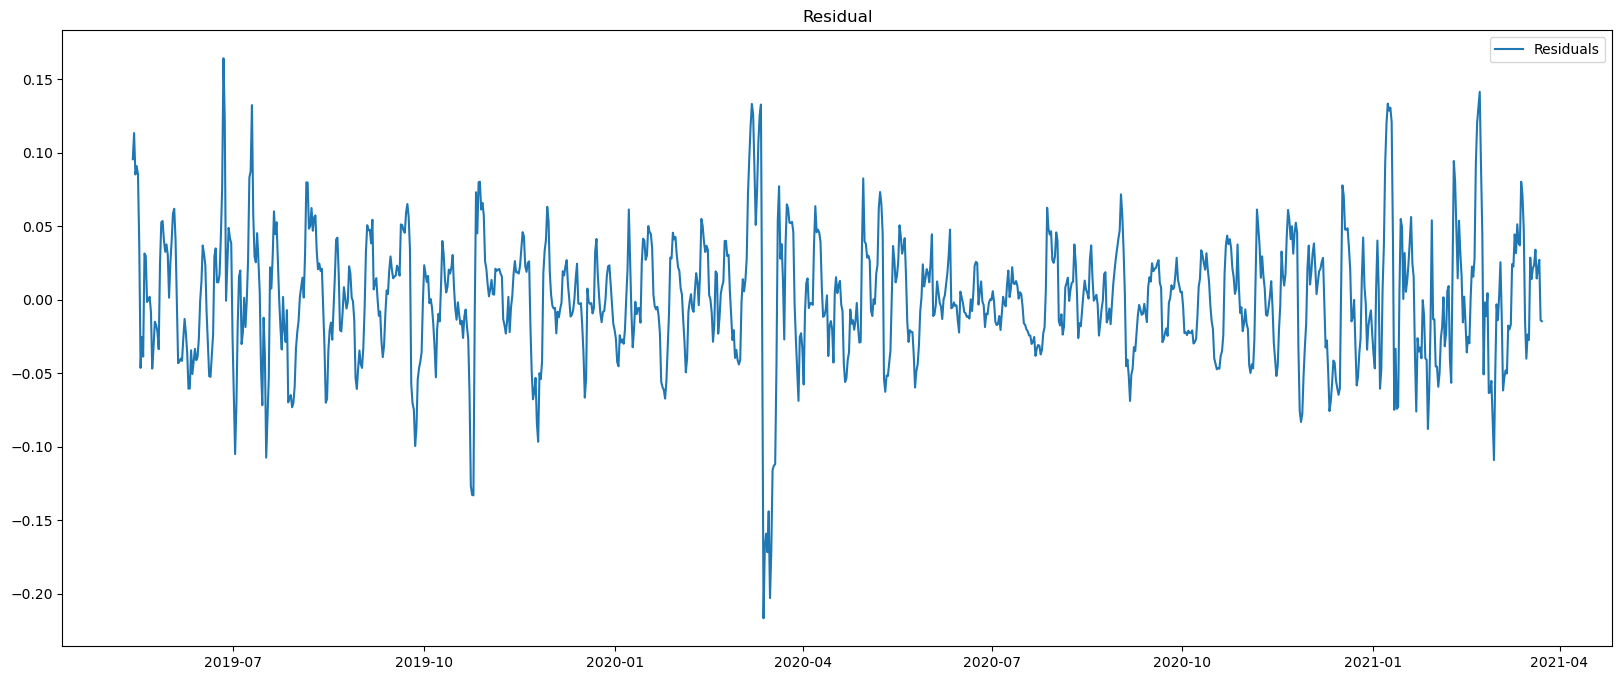

In [51]:
plt.figure(figsize=(20,8))
plt.plot(residual,label='Residuals')
plt.title('Residual')
plt.legend()

In [52]:
# Calculate the p-value using the test_stationarity ADF function
pvalue3 = test_stationarity(seasonal)
#Round off the p-value to four decimal places
pvalue3 = str(pvalue3)
#Print the p-value
print("P-value:", pvalue3)

Results of Dickey - Fuller Test:
P-value: 0.0


* p-value is 0.0
* The p-value obtained is greater than the significance level of 0.05 , there is no reason to reject the null hypothesis. So, the time series is, in fact, non-stationary.

In [53]:
# Full report of ADF test
test_stationarity_ADF(seasonal)

(-5865592262276.563, 0.0, 22, 1090, {'1%': -3.4363635475753824, '5%': -2.864195245967465, '10%': -2.5681837404258903}, -73752.56868462554)
Results of Dickey - Fuller Test:
Test Statistic                -5.865592e+12
p-value                        0.000000e+00
#Lags Used                     2.200000e+01
Number of Observations Used    1.090000e+03
Critical Value (1%)           -3.436364e+00
Critical Value (5%)           -2.864195e+00
Critical Value (10%)          -2.568184e+00
dtype: float64


# Seasonal Conclusion - Agumented Dicky - Fuller (ADF) Test 
* The Test Statistic is -5.865592, which is less than any of the critical values.
* p-value is 0.000000
* The p-value obtained is less than the significance level of 0.05, and the ADF statistic is less than any of the critical values. Clearly, there is a reason to reject the null hypothesis. So, the time series is, in fact, **stationary**.

In [54]:
# Full report of kpss test
test_stationarity_KPSS(seasonal)

(0.006153683531159464, 0.1, 15, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
Results of Kwiatkowski–Phillips–Schmidt–Shin Test:
Test Statistic            0.006154
p-value                   0.100000
#Lags Used               15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/tmp/ipykernel_20/1256350892.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  dftest=kpss(timeseries , regression='c',nlags='auto')


# Seasonal Conclusion - Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test 
* Test Statistic < Critical Value and p-value > 0.05. As a result, we reject the Null hypothesis in favor of an Alternative.
  Hence we conclude series is non-stationary

# Forecasting 
* After removing the trend and seasonality components. We use the `Moving Average` method to perform Time Series Forecasting.
* Create a figure of size `12x8`. Using the plot() method.plot the variables `test` and `predictions` for first 100 values.Use color red for denoting *Predcited Price* and apply marker as '--'.
* Set the title as `Forecasted Price and Actual Price` and add a label called `Predicted Price`.
* Find the Model accuracy by calculating the **RMSE** and **MAE** values.Store the values in the form of a *list* and assign it to a variable.

# Refernces
* Stationary-  https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/
* Trend-Exponential Weighted Moving Average (EWMA)
    * https://towardsdatascience.com/achieving-stationarity-with-time-series-data-abd59fd8d5a0
    * https://medium.com/codex/simple-moving-average-and-exponentially-weighted-moving-average-with-pandas-57d4a457d363


# Thank You
* Please upvotes if you feel it help you and i would love to hear comment if any suggestion :)